# <font color='blue'>Project - Concrete Strength Prediction</font>
*Prasad Menon*


In [2]:
# Problem Statement: Concrete Strength Prediction

# Objective
# To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.


In [3]:
# Exploratory data quality report reflecting the following:
# 1. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, 
# central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers (10 Marks)

# 1. Univariate analysis

In [561]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import randint as sp_randint

In [562]:
concrete_data = pd.read_csv("concrete.csv")

In [563]:
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [564]:
# Description of Data
concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [565]:
# Check Data types
concrete_data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [566]:
# The columns in the data set
concrete_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [567]:
# Check if there is null values
concrete_data.isnull().values.any()  # No null values

False

In [568]:
# Find number of rows and columns in data set
concrete_data.shape  # 1030 rows and 9 columns

(1030, 9)

In [569]:
# Check for duplicate rows
duplicateRowsDF = concrete_data[concrete_data.duplicated()]
print(duplicateRowsDF.head())
print(duplicateRowsDF.shape)  # There are 25 duplicate rows

     cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
278   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
298   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
400   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
420   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
463   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   

     strength  
278      33.4  
298      33.4  
400      35.3  
420      35.3  
463      77.3  
(25, 9)


In [570]:
# Drop Duplicate rows
concrete_data = concrete_data.drop_duplicates()

In [571]:
concrete_data.shape  # After deletion of duplicate rows, there are 1005 records

(1005, 9)

In [572]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
cement          1005 non-null float64
slag            1005 non-null float64
ash             1005 non-null float64
water           1005 non-null float64
superplastic    1005 non-null float64
coarseagg       1005 non-null float64
fineagg         1005 non-null float64
age             1005 non-null int64
strength        1005 non-null float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [573]:
# Number of unique in each column
concrete_data.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [574]:
concrete_data.isna().sum().sum()

0

In [575]:
print(concrete_data.cement.value_counts())        
print(concrete_data.slag.value_counts())    
print(concrete_data.ash.value_counts())  
print(concrete_data.water.value_counts())    
print(concrete_data.superplastic.value_counts())   
print(concrete_data.coarseagg.value_counts())       
print(concrete_data.fineagg.value_counts())    
print(concrete_data.age.value_counts())      

251.4    15
446.0    14
310.0    14
250.0    13
475.0    13
         ..
276.4     1
151.8     1
164.2     1
160.2     1
158.6     1
Name: cement, Length: 278, dtype: int64
0.0      470
189.0     16
24.0      14
20.0      12
145.0     11
        ... 
163.9      1
160.5      1
166.4      1
186.7      1
164.2      1
Name: slag, Length: 185, dtype: int64
0.0      541
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
90.3       1
108.6      1
194.9      1
160.9      1
89.6       1
Name: ash, Length: 156, dtype: int64
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
175.8      1
200.6      1
187.6      1
195.4      1
191.6      1
Name: water, Length: 195, dtype: int64
0.0     378
8.0      27
11.6     23
7.0      19
6.0      17
       ... 
3.1       1
11.5      1
19.0      1
10.5      1
12.2      1
Name: superplastic, Length: 111, dtype: int64
932.0     57
852.1     35
968.0     29
1125.0    24
1047.0    19
          ..
849.3      1
861.0      1
979

# Bi-variate analysis

In [576]:
concrete_data.corr()
# Cement, superplastic and age are having high positive correlation to strength
# Ash, water, coargeagg, fineagg are having negative correlation to the strength

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


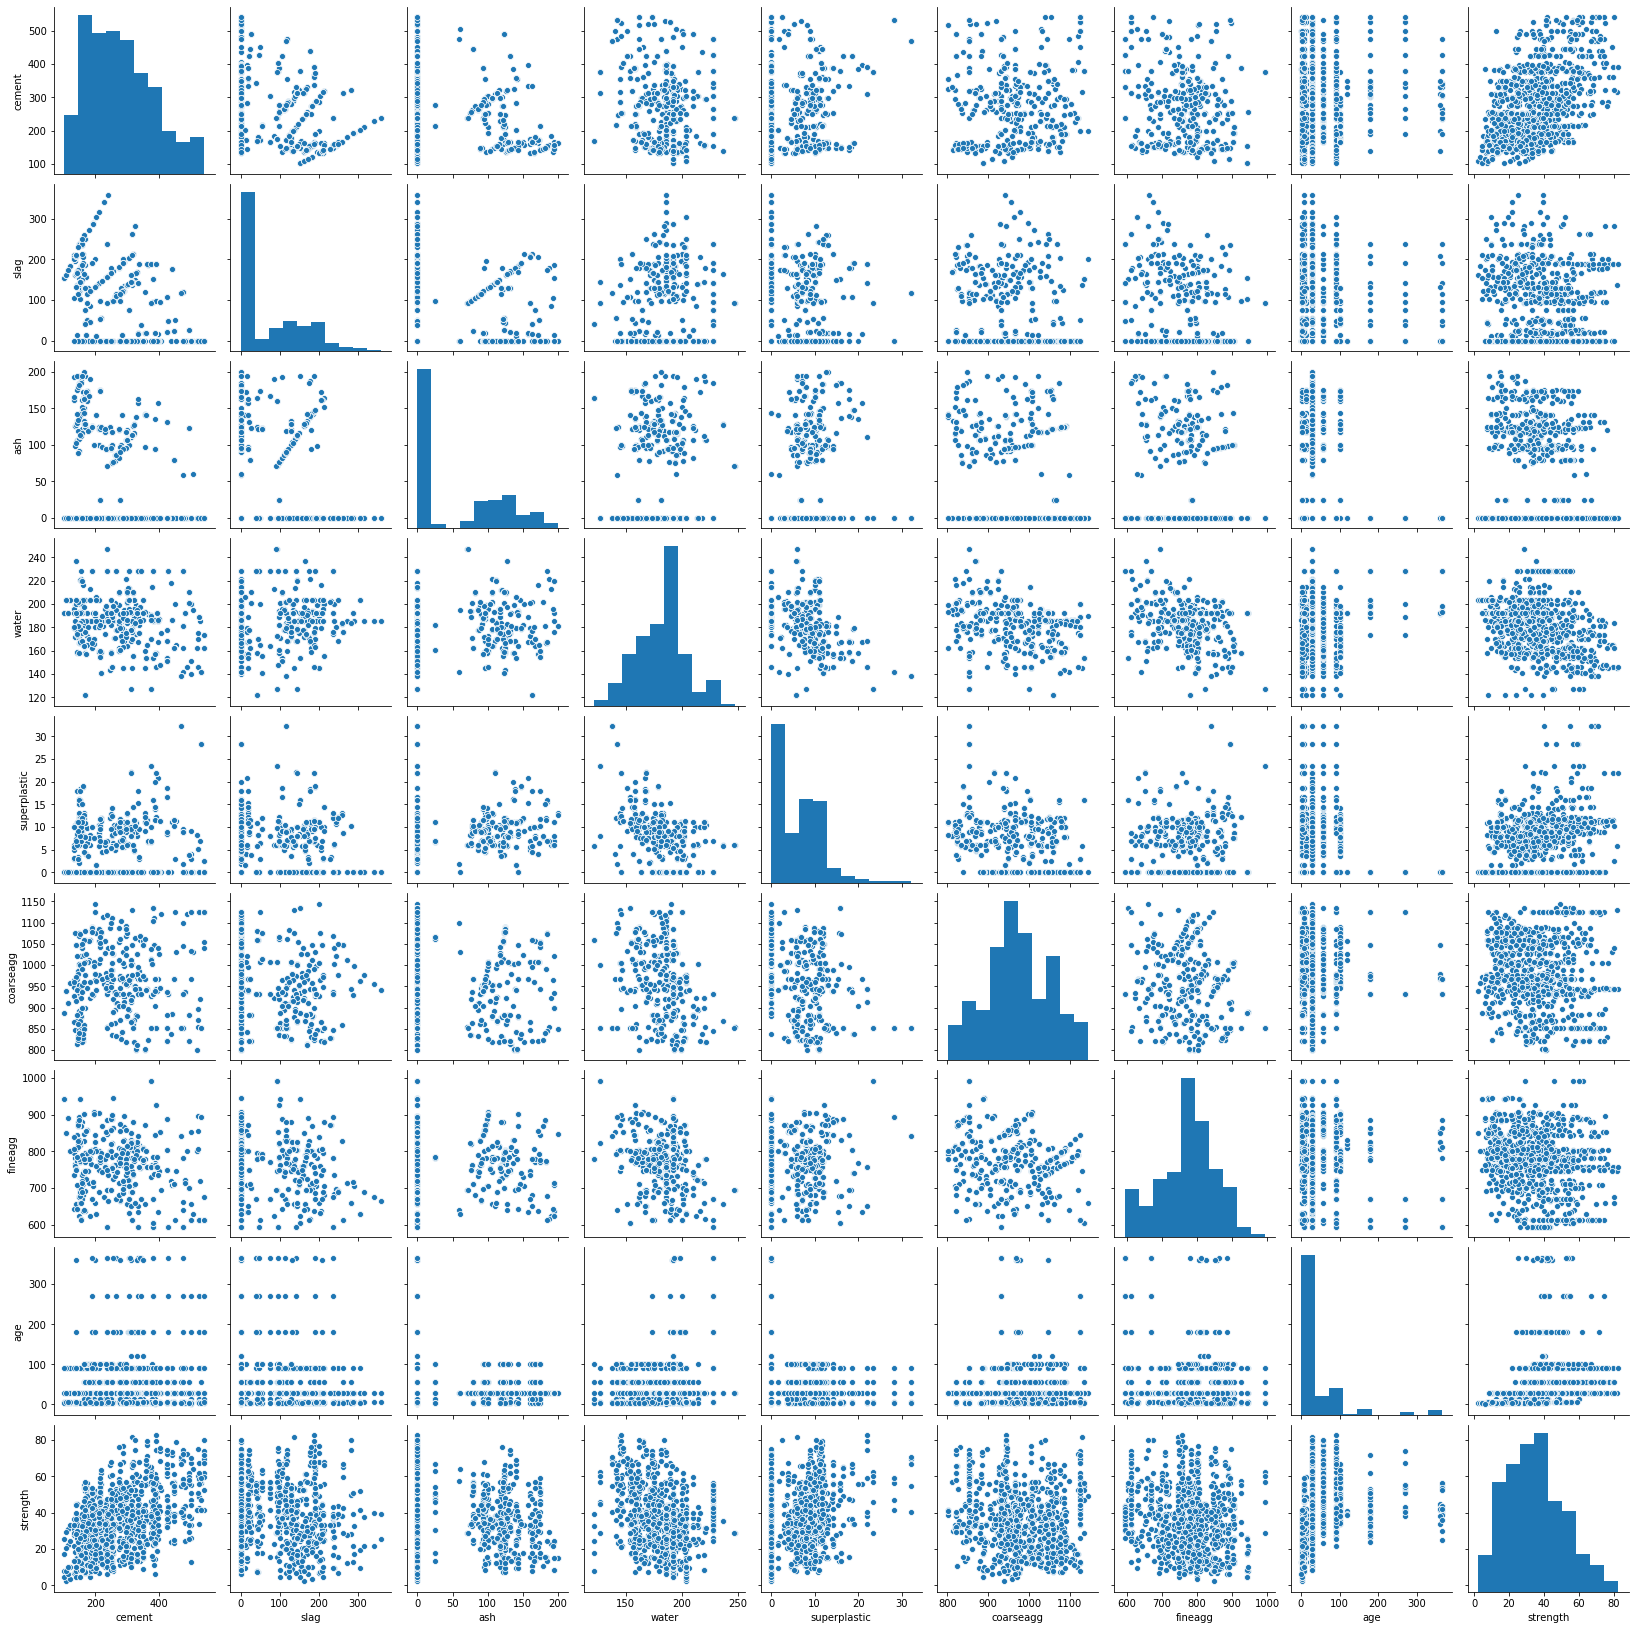

In [577]:
sns.pairplot(concrete_data)

In [578]:
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


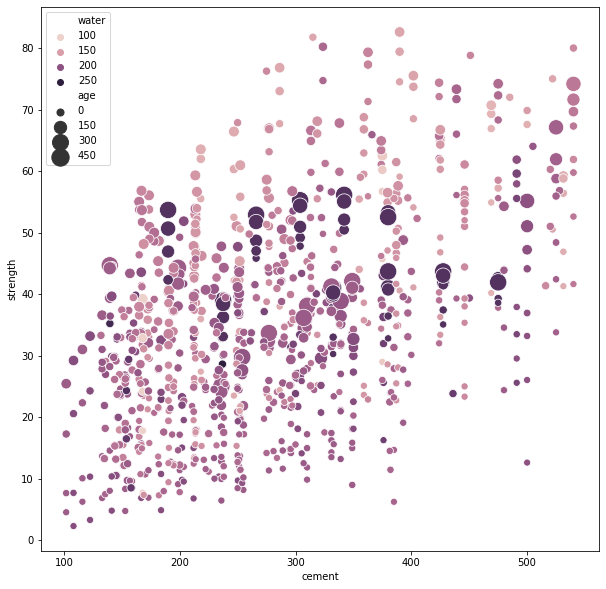

In [634]:
plt.figure(figsize=(10,10)) 
sns.scatterplot(x='cement',y='strength', data=concrete_data, sizes=(50, 300), size='age', hue='water')

# With increase in cemenent, the strength of the concrete increases 
# With increase in age, the strength of concerete increases upto a point
# Concrete with more age need more water

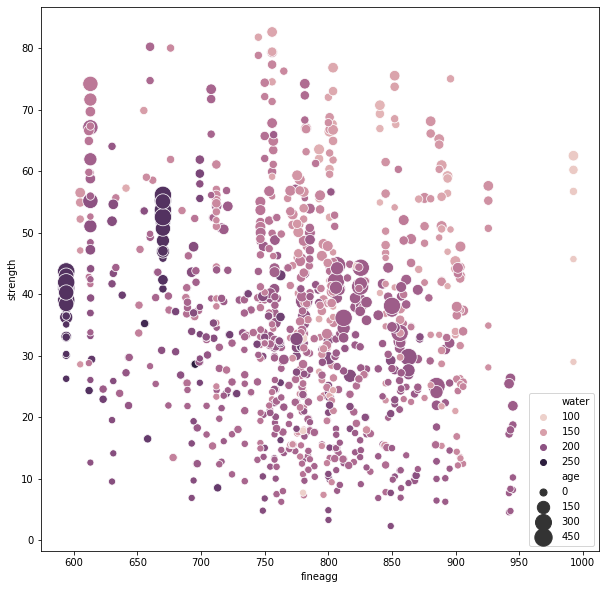

In [635]:
plt.figure(figsize=(10,10)) 
sns.scatterplot(x='fineagg',y='strength', data=concrete_data, sizes=(50, 300), size='age', hue='water')
# Fine Aggregate and Strength are negatively related, with incease in fine aggregate, strength decreases

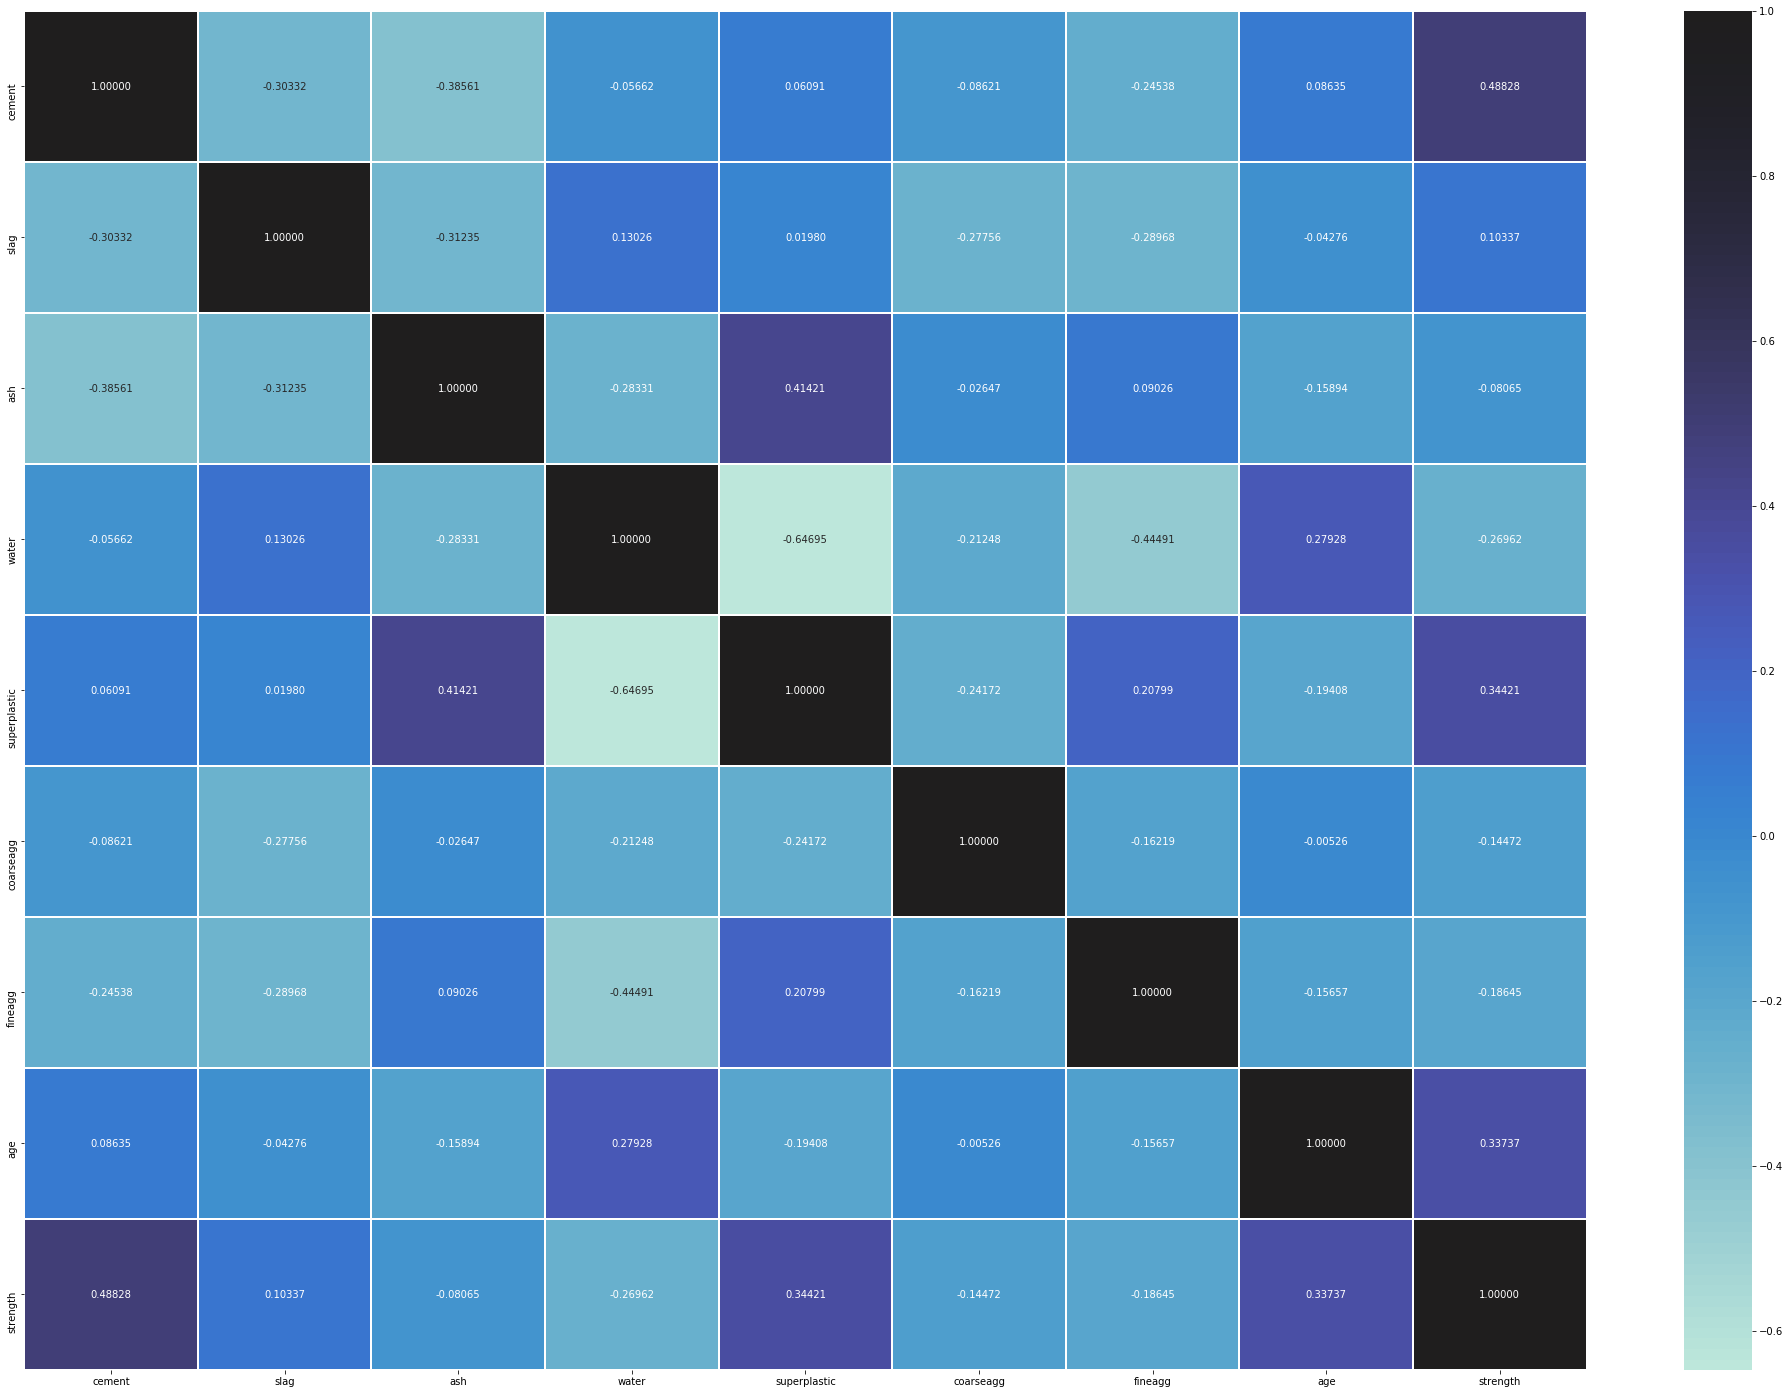

In [581]:
plt.figure(figsize=(35,25))
sns.heatmap(concrete_data.corr(), annot=True, linewidths=.9, fmt= '.5f', center = 1 )  # heatmap
plt.show()

# Feature Engineering techniques

In [582]:
x=concrete_data.drop('strength',axis=1)
y=concrete_data['strength']

# Dividing data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)


# Using standard scalar to  transform the data such that its distribution will have a mean value 0 and standard deviation of 1.
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [583]:
# Simple Linear Regression Model
linearModel = LinearRegression()
linearModel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [584]:
# Linear Regression Model with scaled data
linearModel_scaled = LinearRegression()
linearModel_scaled.fit(x_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Best degree 3 with RMSE 6.679039887263349


Text(0, 0.5, 'RMSE')

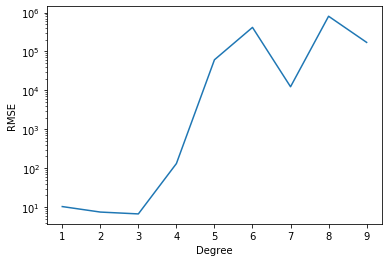

In [585]:
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [586]:
# Polynominal Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

poly_clf = LinearRegression()

poly_clf.fit(X_train_poly, y_train)

print(x_train.shape)
print(x_train_poly.shape) 
# with polynominal features the accuracy has increased from 54.19 tp 68.96.
# 8 columns in the data set has increased to 37 columns after using polynominal features

(703, 8)
(703, 37)


In [587]:
# Ridge
ridge = Ridge(alpha=.3)
ridge.fit(x_train_poly,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00  3.35038712e-01 -1.63822748e-02  2.79452136e-02
  1.45525905e+00 -7.38158817e+00 -1.68065302e-02 -2.18862799e-01
 -6.68101480e-01  1.30882665e-04  2.22450246e-04 -1.77129739e-03
 -2.79963550e-03  3.08217067e-05  8.47075690e-05  5.33326590e-04
  3.99600186e-04 -1.11863040e-03  7.69175287e-04  9.23680945e-06
  3.06776332e-04  7.63726339e-04 -2.33940264e-03 -5.34925971e-03
  9.26976845e-05  3.57479662e-04  1.66548701e-03  1.56789885e-02
 -7.87787032e-04 -1.58875527e-04 -4.39433339e-05  3.85890886e-03
  2.86453339e-03  6.20204813e-03  1.74952066e-04  1.07494745e-04
  5.94228590e-04]


In [588]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_poly,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  1.61233806e-01 -7.45993011e-02 -4.46567092e-01
  1.16026968e+00  1.31995099e-01 -2.47954677e-02 -1.32117939e-01
 -3.55643717e-01  1.37695671e-04  3.01786835e-04 -1.24118391e-03
 -4.01917855e-03  8.41324077e-05  1.23396827e-04  3.65974994e-04
  4.60520297e-04 -7.96219958e-04 -1.32842836e-03  1.58115584e-05
  3.06739261e-04  6.01982538e-04 -1.35140697e-03 -6.84704676e-03
  2.75141526e-04  4.95355680e-04  1.43721323e-03  8.60809893e-03
 -5.81686448e-04 -3.11988196e-04 -3.90881993e-04  1.02170703e-03
 -1.04185009e-03  7.02182607e-03  1.17375502e-04  5.50255503e-05
  4.24091822e-04]


C:\Users\pmenon001c\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23939.34382853769, tolerance: 19.541592919374114
  positive)


In [589]:
# Sinple Linear Regression
print(linearModel.score(x_train,y_train))
print(linearModel.score(x_test,y_test))

0.6217217238825692
0.5419610271323057


In [590]:
# Linear Regression with scaled data
print(linearModel_scaled.score(x_train_scaled,y_train))
print(linearModel_scaled.score(x_test_scaled,y_test))

0.6217217238825692
0.5419610271323057


In [591]:
# Linear Regression with Polynominal Features
print(poly_clf.score(x_train_poly, y_train))
print(poly_clf.score(x_test_poly, y_test))

0.7594975479928061
0.689671979801322


In [592]:
# Ridge Regression
print(ridge.score(x_train_poly, y_train))
print(ridge.score(x_test_poly, y_test))

0.7594849428312305
0.6904769942187022


In [593]:
# Lasso Regression
print(lasso.score(x_train_poly, y_train))
print(lasso.score(x_test_poly, y_test))

0.756762857666509
0.6961310046333039


In [594]:
# Simple Linear Model
print("Intercept of the Simple linear equation:",linearModel.intercept_) # see the intercept
print()
print("COefficients of the equation are:")
print(linearModel.coef_)# see the coefficients
print()

#make prediction
pred_linear=linearModel.predict(x_test) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred_linear))
linear_mean_absolute_error=mean_absolute_error(y_test,pred_linear)
print()
print("RMSE:",mean_squared_error(y_test,pred_linear)**0.5)
linear_mean_squared_error=mean_squared_error(y_test,pred_linear)**0.5
print()
print("R2 Squarred:",r2_score(y_test, pred_linear))
linear_r2_score=r2_score(y_test, pred_linear)

Intercept of the Simple linear equation: -46.49337273612008

COefficients of the equation are:
[ 0.13001791  0.1089221   0.09396745 -0.12028826  0.31834964  0.02308799
  0.03229064  0.10906711]

Mean Absolute Error: 8.03671822115955

RMSE: 10.316849412941323

R2 Squarred: 0.5419610271323057


In [595]:
# Simple Linear Model with Standard  Scaler
print("Intercept of the linear equation with Standard Scaler:",linearModel_scaled.intercept_) # see the intercept
print()
print("COefficients of the equation are:")
print(linearModel_scaled.coef_)# see the coefficients
print()

#make prediction
pred_scaled=linearModel_scaled.predict(x_test_scaled) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred_scaled))
linear_scaled_mean_absolute_error=mean_absolute_error(y_test,pred_scaled)
print()
print("RMSE:",mean_squared_error(y_test,pred_scaled)**0.5)
linear_scaled_mean_squared_error=mean_squared_error(y_test,pred_scaled)**0.5
print()
print("R2 Squarred:",r2_score(y_test, pred_scaled))
linear_scaled_r2_score=r2_score(y_test, pred_scaled)

Intercept of the linear equation with Standard Scaler: 35.78250355618776

COefficients of the equation are:
[13.79578999  9.40561608  6.09287189 -2.56469235  1.86543651  1.76368287
  2.57529769  7.15551961]

Mean Absolute Error: 8.03671822115955

RMSE: 10.316849412941323

R2 Squarred: 0.5419610271323057


In [596]:
# Simple Linear Model with Polynominal Features
print("Intercept of the linear equation with Standard Scaler:",poly_clf.intercept_) # see the intercept
print()
print("COefficients of the equation are:")
print(poly_clf.coef_)# see the coefficients
print()

#make prediction
pred_poly=poly_clf.predict(x_test_poly) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred_poly))
polynominal_mean_absolute_error=mean_absolute_error(y_test,pred_poly)
print()
print("RMSE:",mean_squared_error(y_test,pred_poly)**0.5)
polynominal_mean_squared_error=mean_squared_error(y_test,pred_poly)**0.5
print()
print("R2 Squarred:",r2_score(y_test, pred_poly))
polynominal_r2_score=r2_score(y_test, pred_poly)

Intercept of the linear equation with Standard Scaler: -48.43501265786281

COefficients of the equation are:
[ 4.36773404e-11  3.31017679e-01 -1.88062644e-02  3.57389313e-02
  1.41845033e+00 -8.50059615e+00 -2.10349643e-02 -2.23172951e-01
 -6.74684651e-01  1.27398059e-04  2.17169828e-04 -1.75476679e-03
 -2.40771697e-03  3.06817766e-05  8.38747238e-05  5.33402906e-04
  3.92402116e-04 -1.10559082e-03  1.20891995e-03  8.81760910e-06
  3.05569227e-04  7.64898086e-04 -2.32874887e-03 -4.80376373e-03
  8.63970215e-05  3.51079930e-04  1.66486271e-03  1.69087670e-02
 -7.73469166e-04 -1.45986321e-04 -3.38859004e-05  4.24390925e-03
  3.32495836e-03  6.22098751e-03  1.74819677e-04  1.10980069e-04
  5.95640842e-04]

Mean Absolute Error: 6.755802337360787

RMSE: 8.491929321178901

R2 Squarred: 0.689671979801322


In [597]:
# Ridge Regression
print("Intercept of the linear equation:",ridge.intercept_) # see the intercept
print()
print("COefficients of the equation are:")
print(ridge.coef_)# see the coefficients
print()


#make prediction
pred_ridge=ridge.predict(x_test_poly) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ridge))
ridge_mean_absolute_error=mean_absolute_error(y_test,pred_ridge)
print()
print("RMSE:",mean_squared_error(y_test,pred_ridge)**0.5)
ridge_mean_squared_error=mean_squared_error(y_test,pred_ridge)**0.5
print()
print("R2 Squarred:",r2_score(y_test, pred_ridge))
ridge_r2_score=r2_score(y_test, pred_ridge)

Intercept of the linear equation: -59.12073841302265

COefficients of the equation are:
[ 0.00000000e+00  3.35038712e-01 -1.63822748e-02  2.79452136e-02
  1.45525905e+00 -7.38158817e+00 -1.68065302e-02 -2.18862799e-01
 -6.68101480e-01  1.30882665e-04  2.22450246e-04 -1.77129739e-03
 -2.79963550e-03  3.08217067e-05  8.47075690e-05  5.33326590e-04
  3.99600186e-04 -1.11863040e-03  7.69175287e-04  9.23680945e-06
  3.06776332e-04  7.63726339e-04 -2.33940264e-03 -5.34925971e-03
  9.26976845e-05  3.57479662e-04  1.66548701e-03  1.56789885e-02
 -7.87787032e-04 -1.58875527e-04 -4.39433339e-05  3.85890886e-03
  2.86453339e-03  6.20204813e-03  1.74952066e-04  1.07494745e-04
  5.94228590e-04]

Mean Absolute Error: 6.746709704761582

RMSE: 8.480907814569338

R2 Squarred: 0.6904769942187022


In [598]:
# Lasso Regression
print("Intercept of the linear equation:",lasso.intercept_) # see the intercept
print()
print("COefficients of the equation are:")
print(lasso.coef_)# see the coefficients
print()


#make prediction
pred_lasso=lasso.predict(x_test_poly) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred_lasso))
lasso_mean_absolute_error=mean_absolute_error(y_test,pred_lasso)
print()
print("RMSE:",mean_squared_error(y_test,pred_lasso)**0.5)
lasso_mean_squared_error=mean_squared_error(y_test,pred_lasso)**0.5
print()
print("R2 Squarred:",r2_score(y_test, pred_lasso))
lasso_r2_score=r2_score(y_test, pred_lasso)

Intercept of the linear equation: -37.919473017597824

COefficients of the equation are:
[ 0.00000000e+00  1.61233806e-01 -7.45993011e-02 -4.46567092e-01
  1.16026968e+00  1.31995099e-01 -2.47954677e-02 -1.32117939e-01
 -3.55643717e-01  1.37695671e-04  3.01786835e-04 -1.24118391e-03
 -4.01917855e-03  8.41324077e-05  1.23396827e-04  3.65974994e-04
  4.60520297e-04 -7.96219958e-04 -1.32842836e-03  1.58115584e-05
  3.06739261e-04  6.01982538e-04 -1.35140697e-03 -6.84704676e-03
  2.75141526e-04  4.95355680e-04  1.43721323e-03  8.60809893e-03
 -5.81686448e-04 -3.11988196e-04 -3.90881993e-04  1.02170703e-03
 -1.04185009e-03  7.02182607e-03  1.17375502e-04  5.50255503e-05
  4.24091822e-04]

Mean Absolute Error: 6.655440984970626

RMSE: 8.403091073249193

R2 Squarred: 0.6961310046333039


In [599]:
import statsmodels.api as sm

X2 = sm.add_constant(x_train_poly)
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

lm= sm.OLS(y_train,X2).fit()

print("Pvalues for each column:")
print()
print(lm.pvalues)

Pvalues for each column:

const    0.777668
x1       0.068916
x2       0.942341
x3       0.919684
x4       0.009556
x5       0.156365
x6       0.860473
x7       0.073557
x8       0.276439
x9       0.061709
x10      0.020312
x11      0.000100
x12      0.302497
x13      0.710636
x14      0.240633
x15      0.018127
x16      0.004053
x17      0.084136
x18      0.663678
x19      0.937919
x20      0.000613
x21      0.000756
x22      0.002406
x23      0.191210
x24      0.560523
x25      0.028321
x26      0.000006
x27      0.026097
x28      0.017063
x29      0.656532
x30      0.974712
x31      0.057143
x32      0.204656
x33      0.023803
x34      0.044473
x35      0.542054
x36      0.025500
dtype: float64


In [600]:
#to see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     58.42
Date:                Mon, 25 May 2020   Prob (F-statistic):          2.60e-180
Time:                        11:17:37   Log-Likelihood:                -2474.7
No. Observations:                 703   AIC:                             5023.
Df Residuals:                     666   BIC:                             5192.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -48.4350    171.468     -0.282      0.7

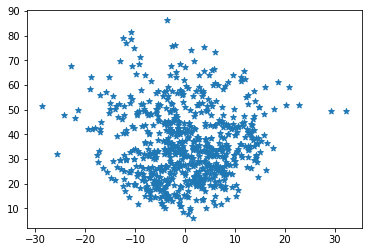

In [601]:
plt.scatter(lm.resid, lm.predict(),marker='*') # Plot between residual(actual - predicted) and predicted values
plt.show()

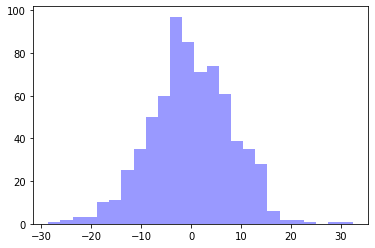

In [602]:
# error distribution
sns.distplot(lm.resid, hist=True, kde=False, color = 'blue')
plt.show()

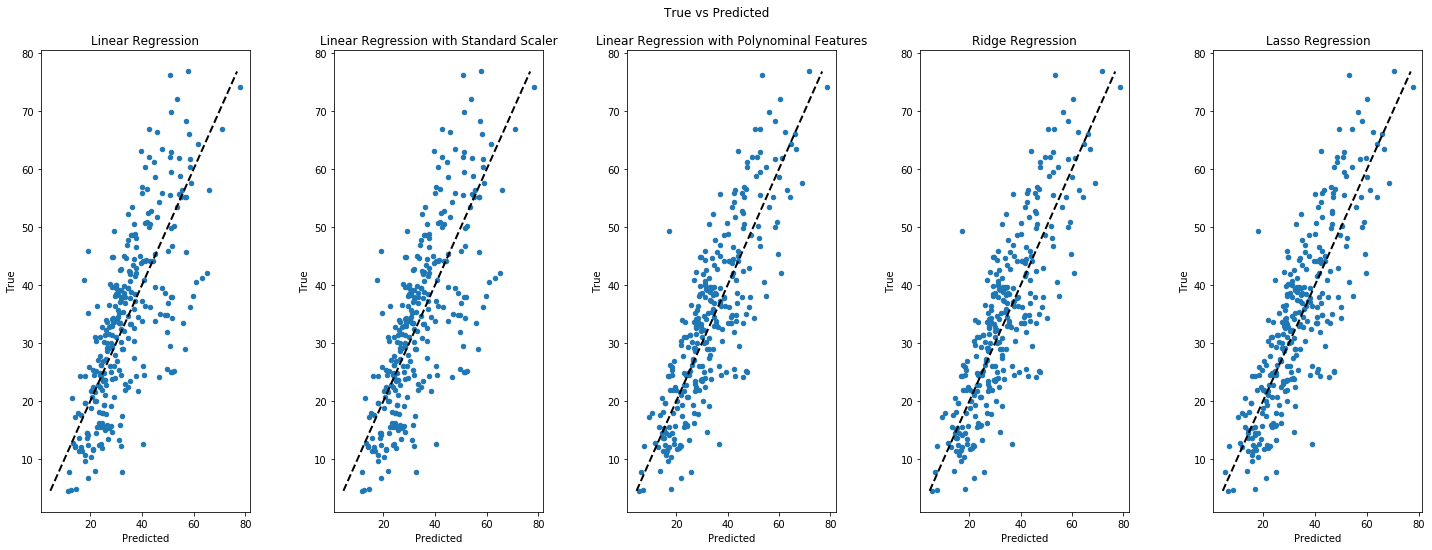

In [603]:
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(1,5, figsize=(20,8)) 
ax1.scatter(pred_linear, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 

ax2.scatter(pred_scaled, y_test, s=20) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True") 
ax2.set_xlabel("Predicted") 
ax2.set_title("Linear Regression with Standard Scaler") 


ax3.scatter(pred_poly, y_test, s=20) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True") 
ax3.set_xlabel("Predicted") 
ax3.set_title("Linear Regression with Polynominal Features") 


ax4.scatter(pred_ridge, y_test, s=20) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True") 
ax4.set_xlabel("Predicted") 
ax4.set_title("Ridge Regression") 

ax5.scatter(pred_lasso, y_test, s=20) 
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax5.set_ylabel("True") 
ax5.set_xlabel("Predicted") 
ax5.set_title("Lasso Regression") 

fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Creating the model and tuning it

In [604]:
#### Algorithm 1   (DecisionTreeRegressor)

In [605]:
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import BaggingRegressor

In [606]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(x_train_poly,y_train)
print(decision_tree_model.score(x_train_poly,y_train))
print(decision_tree_model.score(x_test_poly,y_test))

0.9959463679857883
0.765684346147207


In [607]:
#make prediction
pred_decision_tree=decision_tree_model.predict(x_test_poly) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred_decision_tree))
decision_tree_mean_absolute_error=mean_absolute_error(y_test,pred_decision_tree)
print()
print("RMSE:",mean_squared_error(y_test,pred_decision_tree)**0.5)
decision_tree_mean_squared_error=mean_squared_error(y_test,pred_decision_tree)**0.5
print()
print("R2 Squarred:",r2_score(y_test, pred_decision_tree))
decision_tree_r2_score=r2_score(y_test, pred_decision_tree)

Mean Absolute Error: 5.147935982339956

RMSE: 7.378983294657898

R2 Squarred: 0.765684346147207


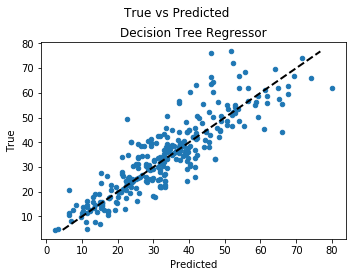

In [608]:
fig, (ax6) = plt.subplots(1,1, figsize=(5,4)) 
ax6.scatter(pred_decision_tree, y_test, s=20) 
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax6.set_ylabel("True") 
ax6.set_xlabel("Predicted") 
ax6.set_title("Decision Tree Regressor") 


fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [609]:
#### Algorithm 2   (RandomForestRegressor)

In [610]:
random_forest_model=RandomForestRegressor(n_estimators=25, random_state=1, max_depth=5,max_features=20)
random_forest_model.fit(x_train_poly,y_train)
print(random_forest_model.score(x_train_poly,y_train))
print(random_forest_model.score(x_test_poly,y_test))

0.8994694863088012
0.8237605031653349


In [611]:
#make prediction
pred_random_forest=random_forest_model.predict(x_test_poly) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred_random_forest))
random_forest_mean_absolute_error=mean_absolute_error(y_test,pred_random_forest);
print()
print("RMSE:",mean_squared_error(y_test,pred_random_forest)**0.5)
random_forest_mean_squared_error=mean_squared_error(y_test,pred_random_forest)**0.5
print()
print("R2 Squarred:",r2_score(y_test, pred_random_forest))
random_forest_r2_score=r2_score(y_test, pred_random_forest)

Mean Absolute Error: 5.120225335007863

RMSE: 6.399521428023081

R2 Squarred: 0.8237605031653349


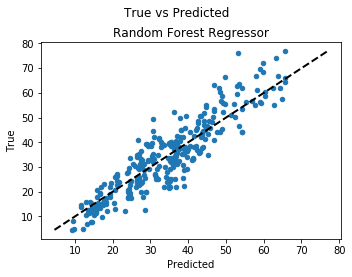

In [612]:
fig, (ax7) = plt.subplots(1,1, figsize=(5,4)) 
ax7.scatter(pred_random_forest, y_test, s=20) 
ax7.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax7.set_ylabel("True") 
ax7.set_xlabel("Predicted") 
ax7.set_title("Random Forest Regressor") 


fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [613]:
#### Algorithm 3 (GradientBoostingRegressor)

In [614]:
gradient_boosting_model = GradientBoostingRegressor(n_estimators=10, learning_rate=.2)
gradient_boosting_model.fit(x_train_poly,y_train)
print(gradient_boosting_model.score(x_train_poly,y_train))
print(gradient_boosting_model.score(x_test_poly,y_test))

0.8554817399885872
0.8061575375081115


In [615]:
#make prediction
pred_gradient_booting=gradient_boosting_model.predict(x_test_poly) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred_gradient_booting))
gradient_boost_mean_absolute_error=mean_absolute_error(y_test,pred_gradient_booting)
print()
print("RMSE:",mean_squared_error(y_test,pred_gradient_booting)**0.5)
gradient_boost_mean_squared_error=mean_squared_error(y_test,pred_gradient_booting)**0.5
print()
print("R2 Squarred:",r2_score(y_test, pred_gradient_booting))
gradient_boost_r2_score=r2_score(y_test, pred_gradient_booting)

Mean Absolute Error: 5.3676455315081855

RMSE: 6.711511437004056

R2 Squarred: 0.8061575375081115


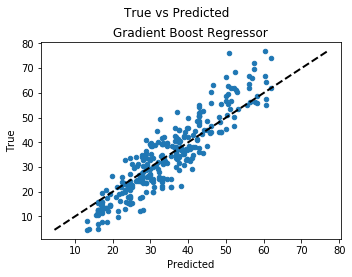

In [616]:
fig, (ax8) = plt.subplots(1,1, figsize=(5,4)) 
ax8.scatter(pred_gradient_booting, y_test, s=20) 
ax8.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax8.set_ylabel("True") 
ax8.set_xlabel("Predicted") 
ax8.set_title("Gradient Boost Regressor") 


fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## K fold cross validation

Linear: 59.002907 (6.461786) (44.824234) (68.027597)
Ridge: 59.002914 (6.461820) (44.824227) (68.027660)
Lasso: 58.972775 (6.535050) (44.740189) (68.006906)
Decision Tree: 85.506426 (3.550757) (80.157586) (90.739682)
Ramdom Forest: 91.335166 (2.138442) (89.043118) (94.439074)
Gradient Boost: 90.188417 (2.100544) (86.518623) (92.921964)


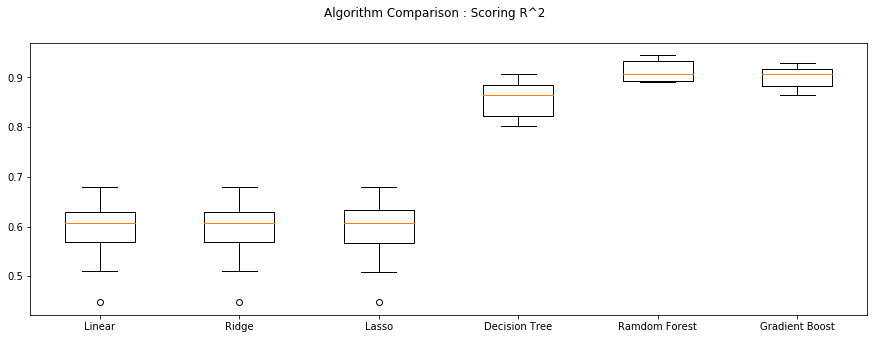

Linear: -10742.026852 (1498.418609) (-13294.610817) (-8949.333282)
Ridge: -10742.024621 (1498.424829) (-13294.612515) (-8949.315533)
Lasso: -10749.003548 (1512.408010) (-13314.861590) (-8955.124726)
Decision Tree: -3872.981764 (1048.476177) (-6074.977748) (-2433.666325)
Ramdom Forest: -2370.946610 (671.692812) (-3701.378416) (-1426.968796)
Gradient Boost: -2601.139982 (670.934326) (-4033.486817) (-1671.365253)


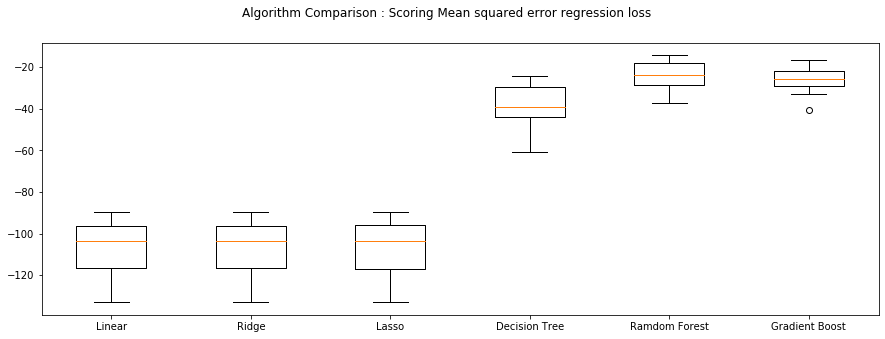

In [617]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('Linear', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Ramdom Forest', RandomForestRegressor()))
models.append(('Gradient Boost', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'r2'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) (%f) (%f)" % (name, cv_results.mean() *100.0, cv_results.std()*100.0,  cv_results.min()*100,  cv_results.max()*100)
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparison : Scoring R^2')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) (%f) (%f)" % (name, cv_results.mean() *100.0, cv_results.std()*100.0,  cv_results.min()*100,  cv_results.max()*100)
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparison : Scoring Mean squared error regression loss')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [618]:
Mean_Absolute_Error=[linear_mean_absolute_error, linear_scaled_mean_absolute_error, polynominal_mean_absolute_error, ridge_mean_absolute_error,lasso_mean_absolute_error, decision_tree_mean_absolute_error, random_forest_mean_absolute_error, gradient_boost_mean_absolute_error]
RMSE=[linear_mean_squared_error, linear_scaled_mean_squared_error, polynominal_mean_squared_error, ridge_mean_squared_error, lasso_mean_squared_error, decision_tree_mean_squared_error, random_forest_mean_squared_error, gradient_boost_mean_squared_error]
R2_Squared=[linear_r2_score, linear_scaled_r2_score,polynominal_r2_score,ridge_r2_score, lasso_r2_score, decision_tree_r2_score, random_forest_r2_score, gradient_boost_r2_score]
R2_Training=[.621,.621,.759,.759,.756,.99,.91,.90]
R2_Testing=[.621,.541,.689,.690,.696,.81,.81,.84]
Cross_Validation_Mean=[59.002,59.002,59.002,59.002,58.97,85.56,91.19,90.17]
Cross_Validation_Max=[68.02,68.02,68.02,68.02,68.00,89.54,94.29,92.94]
Cross_Validation_Min=[44.82,44.82,44.82,44.82,44.74,81.42,88.87,86.51]

col={'Mean_Absolute_Error':Mean_Absolute_Error,'RMSE':RMSE, 'R2_Squared':R2_Squared, 'R2 Training': R2_Training,'R2_Testing': R2_Testing, 'Cross_Validation_Mean': Cross_Validation_Mean, 'Cross_Validation_Max': Cross_Validation_Max, 'Cross_Validation_Min': Cross_Validation_Min }
models=['Linear Regression','Linear Regression with Standard Scaler','Linear Regression with Polynominal Features', 'Ridge Regression','Lasso Regression','Decision Tree Regression','Random Forest Regression', 'Gradient Boost Regression']

from pandas import DataFrame
df=DataFrame(data=col,index=models)
df

,Mean_Absolute_Error,RMSE,R2_Squared,R2 Training,R2_Testing,Cross_Validation_Mean,Cross_Validation_Max,Cross_Validation_Min
Linear Regression,8.036718,10.316849,0.541961,0.621,0.621,59.002,68.02,44.82
Linear Regression with Standard Scaler,8.036718,10.316849,0.541961,0.621,0.541,59.002,68.02,44.82
Linear Regression with Polynominal Features,6.755802,8.491929,0.689672,0.759,0.689,59.002,68.02,44.82
Ridge Regression,6.746710,8.480908,0.690477,0.759,0.690,59.002,68.02,44.82
Lasso Regression,6.655441,8.403091,0.696131,0.756,0.696,58.970,68.00,44.74
Decision Tree Regression,5.147936,7.378983,0.765684,0.990,0.810,85.560,89.54,81.42
Random Forest Regression,5.120225,6.399521,0.823761,0.910,0.810,91.190,94.29,88.87
Gradient Boost Regression,5.367646,6.711511,0.806158,0.900,0.840,90.170,92.94,86.51


## Feature Importance

Feature: 0, Score: 0.13002
Feature: 1, Score: 0.10892
Feature: 2, Score: 0.09397
Feature: 3, Score: -0.12029
Feature: 4, Score: 0.31835
Feature: 5, Score: 0.02309
Feature: 6, Score: 0.03229
Feature: 7, Score: 0.10907


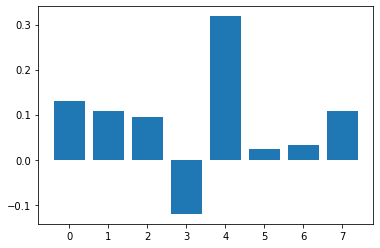

In [619]:
importance = linearModel.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Techniques employed to squeeze that extra performance out of the model without making it overfit.
Use Grid Search orRandom Search on any of the two models used above. 
Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)


## RandomizedSearchCV on Random Forest Regression

In [620]:
param_random_forest = {"max_depth": [3, None],
              "max_features": sp_randint(1, 35),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}

In [621]:
random_forest_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [622]:
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(random_forest_model, param_distributions=param_random_forest, n_iter=samples) #default cv = 3

In [623]:
randomCV.fit(x_train_poly, y_train)

 
print(randomCV.best_params_)
print(randomCV.best_estimator_)
print(np.abs(randomCV.best_score_))

{'bootstrap': True, 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
0.8858341684620367


## Hyperparameter Tuning on Random Forest Regression

In [624]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print("Mean Absolute Error:",mean_absolute_error(test_labels,predictions))
    print("RMSE:",mean_squared_error(test_labels,predictions)**0.5)
    print("R2 Squarred:",r2_score(test_labels, predictions))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [625]:
# Base Model
base_model = RandomForestRegressor(n_estimators=25, random_state=1, max_depth=5,max_features=25)
base_model.fit(x_train_poly, y_train)
base_accuracy = evaluate(base_model, x_test_poly, y_test)

Mean Absolute Error: 5.107386371618163
RMSE: 6.459026343171771
R2 Squarred: 0.8204677967337516
Model Performance
Average Error: 5.1074 degrees.
Accuracy = 81.42%.


In [626]:
# Best model based on hyper parameter tuning
best_random = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=22, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
best_random.fit(x_train_poly, y_train)
random_accuracy = evaluate(best_random, x_test_poly, y_test)

Mean Absolute Error: 3.9461985998107845
RMSE: 5.3332532665660475
R2 Squarred: 0.8775968300566478
Model Performance
Average Error: 3.9462 degrees.
Accuracy = 86.45%.


#### Results after Hyper Paramter Tuning
1. After Hyper paramter tuning, Average error reduced from 5.1 to 3.9 and Accuracy increased from 81.42% to 86.45%
2. There is a 5% increase in accuracy after hyperparameter tuning

## RandomizedSearchCV on Gradient Boost Regression

In [627]:
param_gradient_boost = {"max_depth": [3, None],
              "max_features": sp_randint(1, 35),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11)}

In [628]:
gradient_boosting_model.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [629]:
samples = 10  # number of random samples 
gradientCV = RandomizedSearchCV(gradient_boosting_model, param_distributions=param_gradient_boost, n_iter=samples) #default cv = 3

gradientCV.fit(x_train_poly, y_train)

print(gradientCV.best_params_)
print(gradientCV.best_estimator_)
print(np.abs(gradientCV.best_score_))

{'max_depth': None, 'max_features': 22, 'min_samples_leaf': 7, 'min_samples_split': 8}
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls',
                          max_depth=None, max_features=22, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=7, min_samples_split=8,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.8688925227090205


## Hyperparameter Tuning on Gradient Boost Regression

In [630]:
# Base Model Gradient Boost Regression
base_model_gradient_boost = GradientBoostingRegressor(n_estimators=10, learning_rate=.2)
base_model_gradient_boost.fit(x_train_poly, y_train)
base_accuracy_gradient_boost = evaluate(base_model_gradient_boost, x_test_poly, y_test)

Mean Absolute Error: 5.367645531508186
RMSE: 6.711511437004057
R2 Squarred: 0.8061575375081115
Model Performance
Average Error: 5.3676 degrees.
Accuracy = 78.45%.


In [631]:
# Best model based on hyper parameter tuning
best_random_gradient_boost = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls',
                          max_depth=None, max_features=28, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
best_random_gradient_boost.fit(x_train_poly, y_train)
random_accuracy_gradient_boost = evaluate(best_random_gradient_boost, x_test_poly, y_test)

Mean Absolute Error: 4.114025335284961
RMSE: 5.484276273410305
R2 Squarred: 0.8705664395041667
Model Performance
Average Error: 4.1140 degrees.
Accuracy = 84.73%.


#### Results after Hyper Paramter Tuning
1. After Hyper paramter tuning, Average error reduced from 5.3 to 4.17 and Accuracy increased from 78.42% to 84.18%
2. There is a 6% increase in accuracy after hyperparameter tuning

## Model Comparison :  Before vs After Hyper Parameter Tuning

In [632]:
# Before Hyper Paramter Tuning
Mean_Absolute_Error=[5.1,5.3]
RMSE=[6.3,6.7]
R2_Squared=[.82,.80]
Accuracy=[81.42,78.45]
col={'Mean_Absolute_Error':Mean_Absolute_Error,'RMSE':RMSE, 'R2_Squared':R2_Squared, 'Accuracy':Accuracy}
models=['Before Tuning : Random Forest Regression', 'Before Tuning: Gradient Boost Regression']

from pandas import DataFrame
df=DataFrame(data=col,index=models)
df

,Mean_Absolute_Error,RMSE,R2_Squared,Accuracy
Before Tuning : Random Forest Regression,5.1,6.3,0.82,81.42
Before Tuning: Gradient Boost Regression,5.3,6.7,0.80,78.45


In [633]:
# After Hyper Parameter Tuning
Mean_Absolute_Error=[3.94,4.1]
RMSE=[5.33,5.35]
R2_Squared=[.877,.866]
Accuracy=[86.45,84.64]

col={'Mean_Absolute_Error':Mean_Absolute_Error,'RMSE':RMSE, 'R2_Squared':R2_Squared, 'Accuracy':Accuracy}
models=['After Tuning: Random Forest Regression', 'After Tuning: Gradient Boost Regression']

from pandas import DataFrame
df=DataFrame(data=col,index=models)
df

,Mean_Absolute_Error,RMSE,R2_Squared,Accuracy
After Tuning: Random Forest Regression,3.94,5.33,0.877,86.45
After Tuning: Gradient Boost Regression,4.10,5.35,0.866,84.64


## Conclusion